# Covid 19 Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
CV=pd.read_csv('Covid_19.csv',parse_dates=['Date'])
CV.shape

(23688, 5)

In [3]:
CV.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [4]:
CV.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [5]:
CV.isnull().sum()


Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

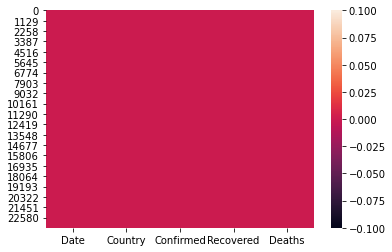

In [6]:
sns.heatmap(CV.isnull())
plt.show()

In [7]:
CV_dates=pd.DataFrame()

In [8]:
CV_dates['Month']=CV['Date'].dt.month_name()
CV_dates['Year']=CV['Date'].dt.year
CV_dates['Day']=CV['Date'].dt.day_name()
CV_dates

,Month,Year,Day
0,January,2020,Wednesday
1,January,2020,Wednesday
2,January,2020,Wednesday
3,January,2020,Wednesday
4,January,2020,Wednesday
...,...,...,...
23683,May,2020,Tuesday
23684,May,2020,Tuesday
23685,May,2020,Tuesday
23686,May,2020,Tuesday


In [9]:
CV_dates['Year'].drop_duplicates()

0    2020
Name: Year, dtype: int64

In [10]:
CV.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [11]:
CV1=pd.concat([CV,CV_dates],axis=1)
CV1.head()

,Date,Country,Confirmed,Recovered,Deaths,Month,Year,Day
0,2020-01-22,Afghanistan,0,0,0,January,2020,Wednesday
1,2020-01-22,Albania,0,0,0,January,2020,Wednesday
2,2020-01-22,Algeria,0,0,0,January,2020,Wednesday
3,2020-01-22,Andorra,0,0,0,January,2020,Wednesday
4,2020-01-22,Angola,0,0,0,January,2020,Wednesday


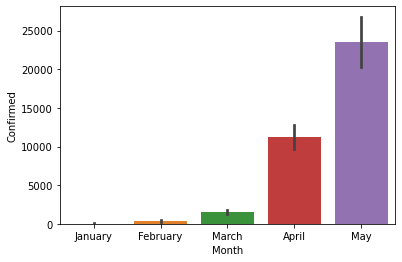

In [12]:
sns.barplot(x='Month',y='Confirmed',data=CV1)
plt.show()

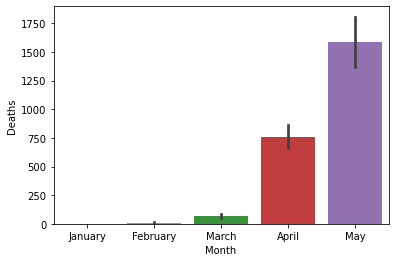

In [13]:
sns.barplot(x='Month',y='Deaths',data=CV1)
plt.show()

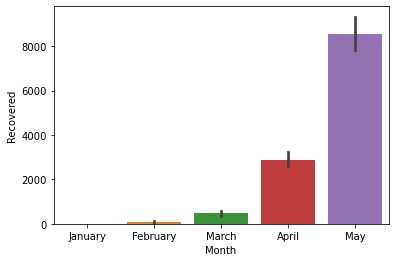

In [14]:
sns.barplot(x='Month',y='Recovered',data=CV1)
plt.show()

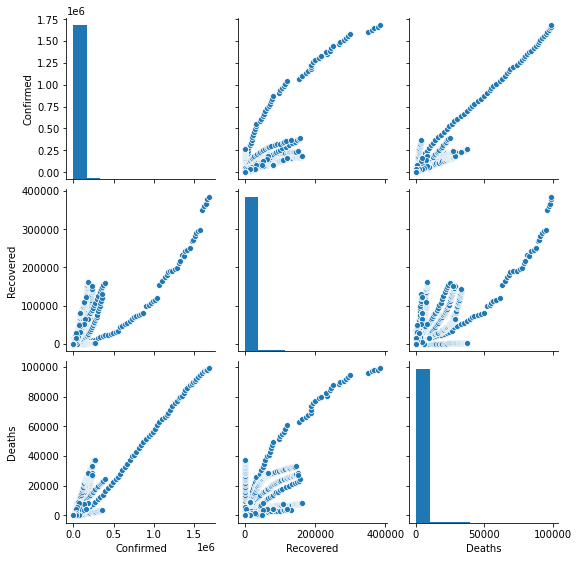

In [15]:
sns.pairplot(CV)

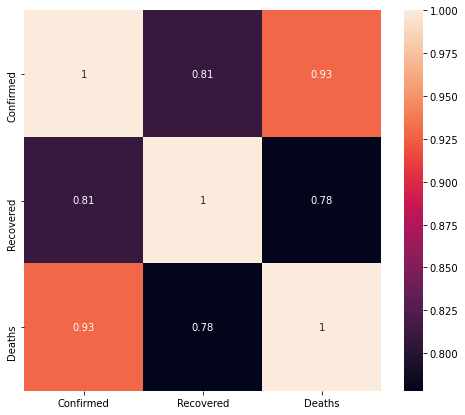

In [16]:
corr_hmap=CV.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [17]:
CV1.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
Year          0.000000
dtype: float64

In [18]:
x=CV.iloc[:,2:4]
x.head()

,Confirmed,Recovered
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [19]:
y=CV.iloc[:,4:5]
y.head()

,Deaths
0,0
1,0
2,0
3,0
4,0


In [20]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [22]:
LR= LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [23]:
LR.coef_

array([[0.06004907, 0.01518086]])

In [24]:
LR.intercept_

array([9.83049737])

In [25]:
LR.score(x_train,y_train)

0.8709516481408202

In [26]:
pred=LR.predict(x_test)

In [27]:
print('Error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

Error:
Mean absolute error: 279.5564297939285
Mean squared error: 2284196.475558355
Root Mean Squared Error: 1511.3558401509404


In [28]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8558462545159045


In [29]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.8709516481408202


array([0.06004907, 0.01518086])

In [30]:
from sklearn.linear_model import Ridge
Rd=Ridge(alpha=0.0001)
Rd.fit(x_train,y_train)
Rdpred=Rd.predict(x_test)
print(Rd.score(x_train,y_train))
Rd.coef_

0.8709516481408202


array([[0.06004907, 0.01518086]])

In [31]:
from sklearn.linear_model import Lasso
Ls=Lasso(alpha=0.0001)
Ls.fit(x_train,y_train)
Lspred=Ls.predict(x_test)
print(Ls.score(x_train,y_train))
Ls.coef_

0.8709516481408202


array([0.06004907, 0.01518086])

In [32]:
import joblib

In [33]:
joblib.dump(ElasticNet,'covid19.obj')

['covid19.obj']